In [230]:
import numpy as np
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt

from keras.datasets import fashion_mnist


matplotlib.pyplot.style.use('fivethirtyeight')
%matplotlib inline

In [231]:
(X_train,Y_train),(X_test,Y_test)=fashion_mnist.load_data()

X_train=X_train[0:100]
Y_train=Y_train[0:100]
# Converting the image to one-long vector.
X_train=np.reshape(X_train,newshape=(X_train.shape[0],-1))
X_test=np.reshape(X_test,newshape=(X_test.shape[0],-1))

# Reshaping the label from : (rows,) -----> (rows,1).
Y_train=np.reshape(Y_train,newshape=(Y_train.shape[0],1))
Y_test=np.reshape(Y_test,newshape=(Y_test.shape[0],1))

# Converting to the labels to one-hot vectors.
Y_train_hot =(np.arange(classes)==Y_train[:,:]).astype(np.float32)
Y_test_hot = (np.arange(classes)==Y_test[:,:]).astype(np.float32)


In [232]:
# Settings

num_iterations=300
LEARNING_RATE=0.001
features=X_train.shape[1]
classes=10

In [233]:
class NeuralNetwork:
    
    def __init__(self):
        
        tf.reset_default_graph()
        
        self.input=tf.placeholder(dtype=tf.float32,shape=[None,features],name='input')
        self.label=tf.placeholder(dtype=tf.float32,shape=[None,classes],name='label')
        
        self.layer1=tf.layers.dense(units=100,activation=tf.nn.tanh,inputs=self.input)
        self.layer2=tf.layers.dense(units=90,activation=tf.nn.tanh,inputs=self.layer1)
        self.layer3=tf.layers.dense(units=80,activation=tf.nn.tanh,inputs=self.layer2)
        self.layer4=tf.layers.dense(units=70,activation=tf.nn.tanh,inputs=self.layer3)
        self.layer5=tf.layers.dense(units=60,activation=tf.nn.tanh,inputs=self.layer4)
        self.layer6=tf.layers.dense(units=50,activation=tf.nn.tanh,inputs=self.layer5)
        self.layer7=tf.layers.dense(units=40,activation=tf.nn.tanh,inputs=self.layer6)
        self.layer8=tf.layers.dense(units=30,activation=tf.nn.tanh,inputs=self.layer7)
        
        self.output=tf.layers.dense(units=10,activation=None,inputs=self.layer8)
        
        self.loss=tf.losses.softmax_cross_entropy(onehot_labels=self.label,logits=self.output)
        self.optimizer=tf.train.AdamOptimizer(learning_rate=LEARNING_RATE)
        self.gradients=self.optimizer.minimize(self.loss)
        
        
        self.isCorrect=tf.equal(tf.argmax(self.label,1),tf.argmax(self.output,1))
        self.accuracy=tf.reduce_mean(tf.cast(self.isCorrect,tf.float32))
        
        
        self.session=tf.Session()
        
        self.init=tf.global_variables_initializer()
        self.session.run(self.init)
        
        self.saver=tf.train.Saver()
    
    def predict(self,X):
        #state=np.reshape(state,newshape=(1,state_size))
        
        return self.session.run(self.output,feed_dict={self.input:X})
    
    
    def train(self,X,Y):
        _,loss=self.session.run([self.gradients,self.loss],feed_dict={self.input:X,self.label:Y})
        
        return loss
    
    
    def get_loss(self,X,Y):
            
        loss=self.session.run(self.loss,feed_dict={self.input:X,self.label:Y})
        return loss
    
    
    def get_accuracy(self,X,Y):
        
        return self.session.run(self.accuracy,feed_dict={self.input:X,self.label:Y})
    
    def save_model(self):
        self.saver.save(self.session,"./EarlyStopping")
        return None
    

In [234]:
def compare_plots(title,data1,plot_name1,data2,plot_name2,
              xlabel,ylabel,file_name):
    
    plt.figure(figsize=(10,8))
    plt.title(title)
    plt.plot(data1, label=plot_name1)
    plt.hold(True)
    plt.plot(data2, label=plot_name2)
    plt.hold(False)
    plt.legend(loc='upper left', frameon=True)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.savefig(file_name)

    
    return None

In [235]:
# Initialize the Network

network=NeuralNetwork()
losses=[]

train_losses=[]
test_losses=[]

trains_accuracy=[]
tests_accuracy=[]

In [240]:
for iteration in range(num_iterations):

        train_loss=network.train(X_train,Y_train_hot)

        if iteration%5==0:
            
            test_accuracy=network.get_accuracy(X_test,Y_test_hot)
            train_accuracy=network.get_accuracy(X_train,Y_train_hot)
            
            old_test_loss=test_loss
            test_loss=network.get_loss(X_test,Y_test_hot)
            
            train_losses.append(train_loss)
            test_losses.append(test_loss)
            
            trains_accuracy.append(train_accuracy)
            tests_accuracy.append(test_accuracy)
            
            if test_loss> old_test_loss:
                network.save_model()
                print("Model is saved")
                break
            
            
            
            
            print('Generation: ' + str(iteration+1) + '. Loss = ' + str(loss))

Model is saved


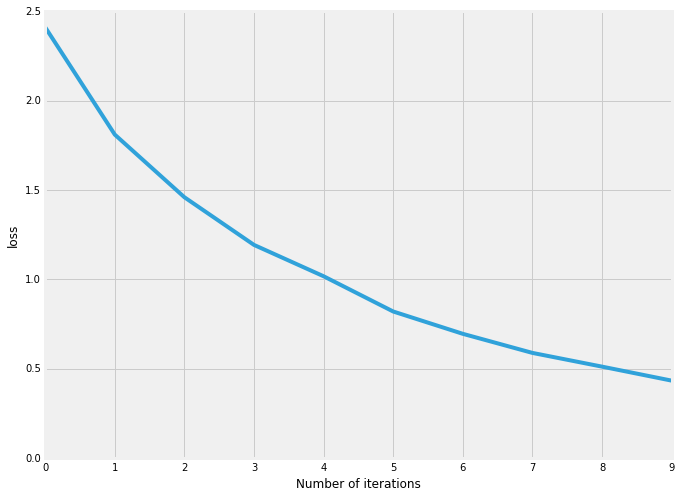

In [237]:
plt.figure(figsize=(10,8))
plt.plot(train_losses)
plt.ylabel('loss')
plt.xlabel('Number of iterations')
plt.savefig("loss.png")

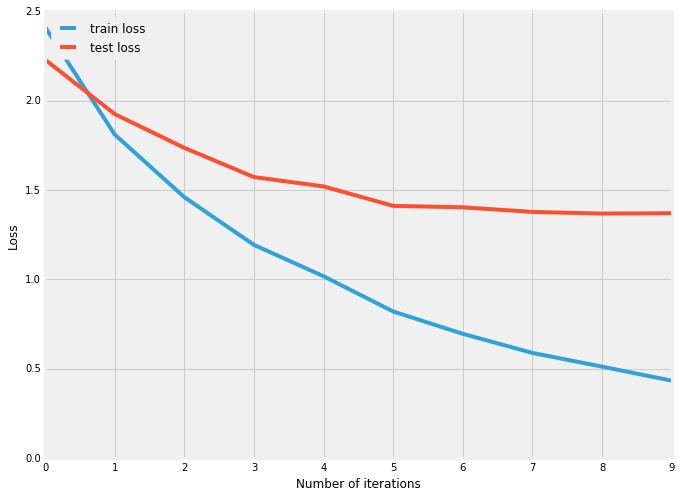

In [238]:
compare_plots(title='train loss VS test loss',
              data1=train_losses,
              plot_name1='train loss',
              data2=test_losses,plot_name2='test loss',
              xlabel='Number of iterations',
              ylabel='Loss',
              file_name='train_loss_VS_test_loss.png')

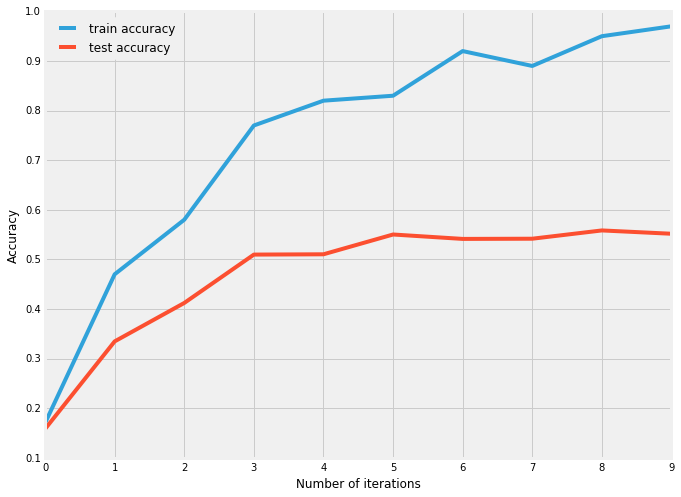

In [239]:
compare_plots(title='train accuracy VS test accuracy',
              data1=trains_accuracy,
              plot_name1='train accuracy',
              data2=tests_accuracy,
              plot_name2='test accuracy',
              xlabel='Number of iterations',
              ylabel='Accuracy',
             file_name="train_acc_VS_test_acc.png")